In [77]:
# All imports I think might help
from IPython.display import Image
import math
import astroplan
from astropy import coordinates, units
from astroplan import Observer
from astropy import units as u
from astropy.utils import iers
import astroquery
iers.conf.IERS_A_URL = "ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all"
iers.conf.IERS_A_URL_MIRROR = "https://datacenter.iers.org/data/9/finals2000A.all"
from astroplan import download_IERS_A
download_IERS_A()
from astroplan import FixedTarget, AirmassConstraint
from astropy.time import Time
from astroplan.plots import plot_airmass
import matplotlib.pyplot as plt
import numpy as np
from astroplan.plots import plot_finder_image
from astroplan.plots import plot_sky
from astropy.utils import iers
from astropy.utils.iers import Conf
iers.Conf.iers_auto_url.set("ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all")

# Observer Information
Name: Pae Swanson
Observation: 2/21 Lab 5
# Observatory information

In [78]:
CTO = Observer(location=coordinates.EarthLocation(lat=29.643018, lon=-82.349004*u.deg, height=31*u.m),
               timezone='EST',
               name='University of Florida Campus Teaching Observatory')
obsStartTime = Time("2021-02-21 23:30:00", format="iso") # in UTC
sunriseTimeJD = CTO.sun_rise_time(obsStartTime) # in jd
sunsetTimeJD = CTO.sun_set_time(obsStartTime)   # in jd
onehour_after_sunset = sunsetTimeJD + 1*u.hour
twohours_after_sunset = sunsetTimeJD + 2*u.hour
threehours_after_sunset = sunsetTimeJD + 3*u.hour
fourhours_after_sunset = sunsetTimeJD + 4*u.hour


obsStartTimeEST = obsStartTime.to_datetime(timezone=CTO.timezone)   # converting to EST
sunriseTimeEST = sunriseTimeJD.to_datetime(timezone=CTO.timezone)
sunsetTimeEST = sunsetTimeJD.to_datetime(timezone=CTO.timezone)

obsStartTimeFormatted = obsStartTimeEST.strftime('%H:%M:%S')        # converting to the numbers humans prefer to look at
sunriseTimeFormatted = sunriseTimeEST.strftime('%H:%M:%S')
sunsetTimeFormatted = sunsetTimeEST.strftime('%H:%M:%S')

print("Longitude and latitude of Campus Teaching Observatory: 29.643018N, 82.349004W",
      "\nObservation starting time:", obsStartTimeFormatted, "02/03/2021",
      "\nSunrise:", sunriseTimeFormatted,
      "\nSunset:", sunsetTimeFormatted)

Longitude and latitude of Campus Teaching Observatory: 29.643018N, 82.349004W 
Observation starting time: 18:30:00 02/03/2021 
Sunrise: 07:06:54 
Sunset: 18:19:22


# Target Information

In [79]:
# Coordinates
m42_coord = coordinates.SkyCoord.from_name("M42")
hpers_coord = coordinates.SkyCoord.from_name("H Persei Cluster")
algol_coord = coordinates.SkyCoord.from_name("Algol")

In [80]:
# Target Declaration
m42_target = FixedTarget(m42_coord, name="M42")
hpers_target = FixedTarget(hpers_coord, name="H Persei Cluster")
algol_target = FixedTarget(algol_coord, name="Algol")

In [81]:
# Right Ascension and Declination
m42_ra, m42_dec = m42_target.ra, m42_target.dec
hpers_ra, hpers_dec = hpers_target.ra, hpers_target.dec
algol_ra, algol_dec = algol_target.ra, algol_target.dec

In [82]:
# Rise and Set Times
m42_rise, m42_set = CTO.target_rise_time(obsStartTime, m42_target), CTO.target_set_time(obsStartTime, m42_target)
hpers_rise, hpers_set = CTO.target_rise_time(obsStartTime, hpers_target), CTO.target_set_time(obsStartTime, hpers_target)
algol_rise, algol_set = CTO.target_rise_time(obsStartTime, algol_target), CTO.target_set_time(obsStartTime, algol_target)

In [83]:
# Apparent Magnitudes
m42_mag = 4
hpers_mag = 3.7
algol_mag = 2

# Target Info

In [84]:
# Print target stats
print(
    "M42:"
        "\nRA and Dec:", "<" + str(m42_ra) + ", " + str(m42_dec) + ">",
        "\nRise and Set Time:", "<" + str(m42_rise.to_datetime(timezone=CTO.timezone)) + ", " + str(m42_set.to_datetime(timezone=CTO.timezone)) + ">",
        "\nBright or Dim:", "Bright, with a magnitude of " + str(m42_mag) + "\n\n"

    "H Persei Cluster:"
        "\nRA and Dec:", "<" + str(hpers_ra) + ", " + str(hpers_dec) + ">",
        "\nRise and Set Time:", "<" + str(hpers_rise.to_datetime(timezone=CTO.timezone)) + ", " + str(hpers_set.to_datetime(timezone=CTO.timezone)) + ">",
        "\nBright or Dim:", "Bright, with a magnitude of " + str(hpers_mag) + "\n\n"

    "Algol:"
        "\nRA and Dec:", "<" + str(algol_ra) + ", " + str(algol_dec) + ">",
        "\nRise and Set Time:", "<" + str(algol_rise.to_datetime(timezone=CTO.timezone)) + ", " + str(algol_set.to_datetime(timezone=CTO.timezone)) + ">",
        "\nBright or Dim:", "Bright, with a magnitude of " + str(algol_mag) + "\n"
)

M42:
RA and Dec: <83d49m19.488s, -5d23m27.996s> 
Rise and Set Time: <2021-02-21 14:10:19.844502-05:00, 2021-02-22 01:43:50.955997-05:00> 
Bright or Dim: Bright, with a magnitude of 4

H Persei Cluster:
RA and Dec: <34d45m00s, 57d07m41.88s> 
Rise and Set Time: <2021-02-21 06:34:56.114092-05:00, 2021-02-22 02:48:40.663324-05:00> 
Bright or Dim: Bright, with a magnitude of 3.7

Algol:
RA and Dec: <47d02m31.9868s, 40d57m20.328s> 
Rise and Set Time: <2021-02-21 09:33:12.339398-05:00, 2021-02-22 01:28:10.575622-05:00> 
Bright or Dim: Bright, with a magnitude of 2



# Telescope & Observing Weather Information
Telescope Type: Meade LX200, GPS
Telescope Diameter: 14"
(or Celestron 11" which I've used more frequently thus far.)

Visbility: All three targets should be relatively high in the sky and visible after sunset from the telescope.
They set well after midnight, and I should hope that I'm done observing by then.
The moon will be up and about 66% full, and will rise at 3pm/15:00, and set around 3am/3:00. The weather might be
cloudy, but it won't be 100% cloud cover (41 total cloud cover at 18:00, 31 at 19:00, 49 at 20:00, and then
decreases from there). There is also a low chance of rain.

# Night Plan
# First Night
Assuming conditions permit it, the targets I plan to observe are M42 and Algol. Algol is a very bright star,
so CCD images will be taken out of focus and at very short exposure times, in order to avoid saturation. Six images for
the mosaic will be taken, using a focal reducer. The exposure time for M42, in contrast to Algol, will be 1-5 minutes
long. M42 wasn't *too* hard to find the last time, but adjusting the telescope so that the desired frames are visible
may take some time. Probably a maximum of 10 minutes for each frame, though I expect it would be much lower. With M42,
we will be taking 6 5-minute long exposures which requires at least 30 minutes. Finding Algol shouldn't be too
difficult, since it is a prominent star in the Perseus constellation.


# Finder Charts

M42

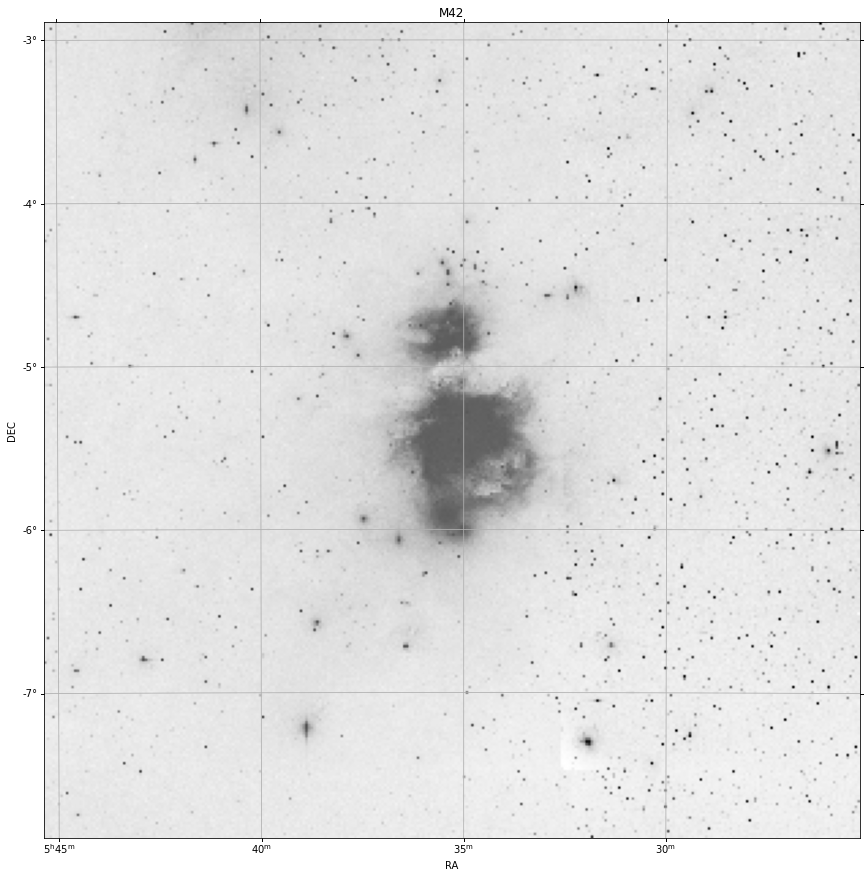

In [85]:
plt.figure(figsize=(15, 15))
ax, hdu = plot_finder_image(m42_target, survey='DSS', fov_radius=300*u.arcmin)

H Persei Cluster

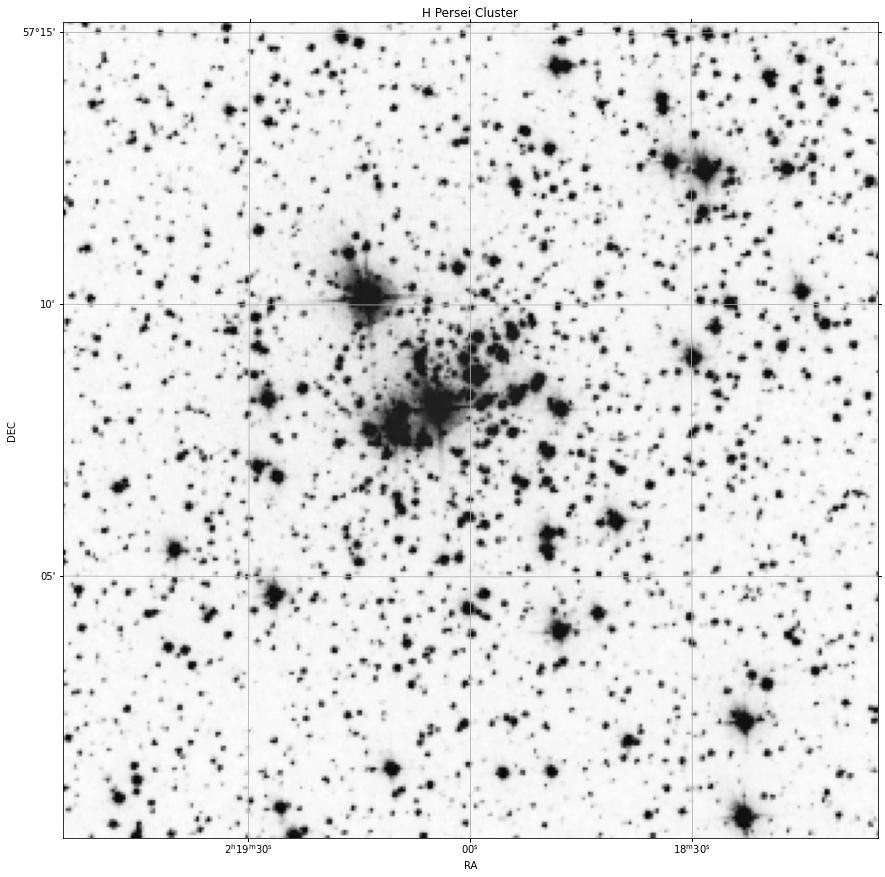

In [86]:
plt.figure(figsize=(15, 15))
ax, hdu = plot_finder_image(hpers_target, survey='DSS', fov_radius=15*u.arcmin)

Algol

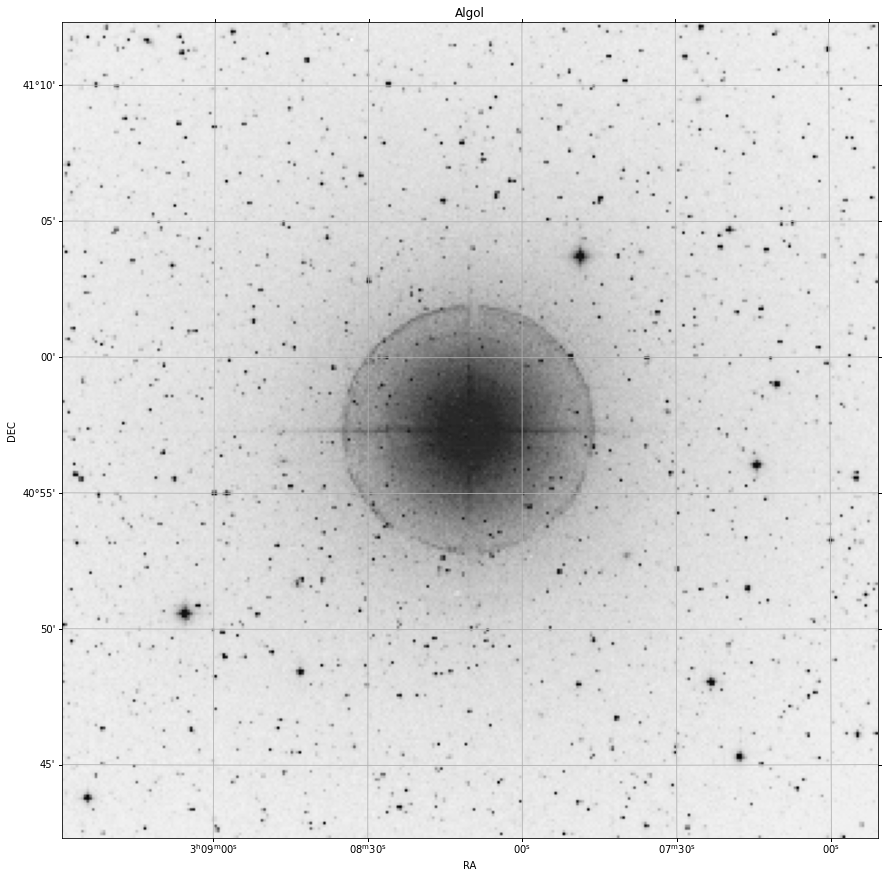

In [87]:
plt.figure(figsize=(15, 15))
ax, hdu = plot_finder_image(algol_target, survey='DSS', fov_radius=30*u.arcmin)


# Mosaic Charts

In [88]:
# These were made in DS9 and just imported from files into Python.
# Green rectangular regions are 5x7 arcmin

M42

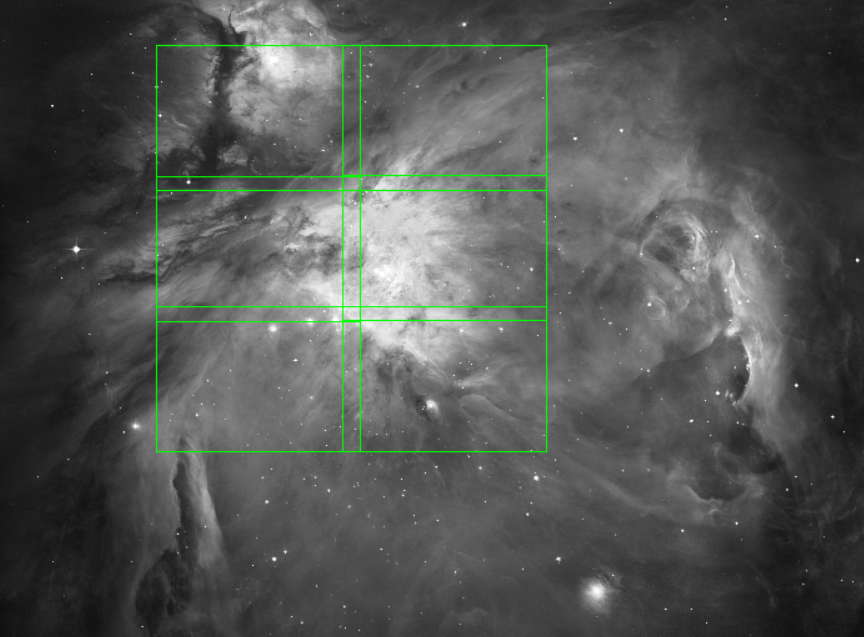

In [89]:
# Scale of this mosaic is 30x30 arcmin
imgm42 = 'mosaicm42.png'
Image(filename=imgm42)

H Persei Cluster

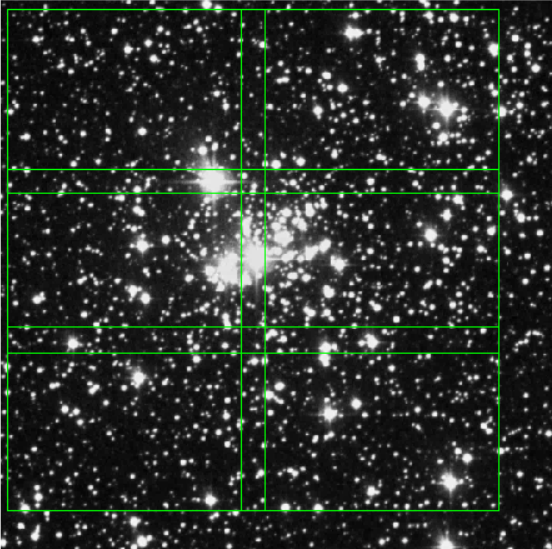

In [90]:
# H Persei Cluster
# Scale of this mosaic is 15x15 arcmin (DS9 wouldn't load H Persei Cluster at 30x30)
imghp = 'mosaichp.png'
Image(filename=imghp)

# Altitude Plots

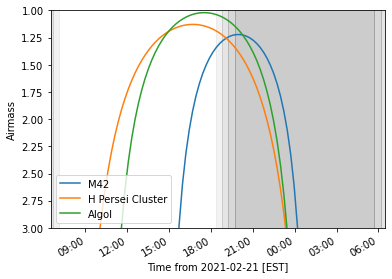

In [91]:
plot_airmass([m42_target, hpers_target, algol_target],
             observer = CTO,
             time = obsStartTimeEST,
             use_local_tz = True,
             brightness_shading = True)
plt.legend(loc='lower left')
plt.show()

# Sky Charts
(Where blue dots are earlier; purple dots are last)
Sky Chart 1: M42, H Persei Cluster, Algol

<PolarAxesSubplot:>

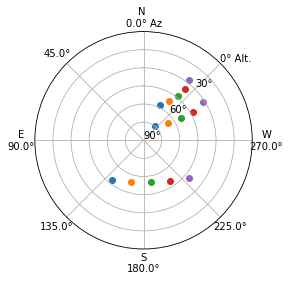

In [92]:
targets = [m42_target, hpers_target, algol_target]
plot_sky(target=targets, observer=CTO, time=sunsetTimeJD)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)
plot_sky(target=targets, observer=CTO, time=threehours_after_sunset)
plot_sky(target=targets, observer=CTO, time=fourhours_after_sunset)

# M42 is bottom-most line of dots, Algol is middle line, and H Persei Cluster is top line (using S as the bottom of the graph)